<a href="https://colab.research.google.com/github/itonsoup/Google-Colab/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_5_%D0%A3%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BD%D0%B0_%D1%81%D0%B8%D0%BD%D1%82%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Импорт данных


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.datasets import fetch_openml

In [ ]:
plt.style.use('dark_background')

## Метод главных компонент


Метод главных компонент - это метод снижения размерности данных путем преобразования их в такую форму, чтобы оставить только максимально полезную информацию. Метод работает без учителя, поэтому под термином полезная информация в данном методе понимается набор независимых друг от друга признаков с максимальной дисперсией (с максимальным разбросом значений). При этом мы изначально полагаем, что интенсивность (в некотором смысле) полезной информации преобладает над интенсивностью каких-то случайных искажений или других не идеальностей нашего набора данных. Для выделения полезной информации в методе главных компонент проводится преобразование данных от набора исходных столбцов (исходных признаков), которые могут содержать шумы и быть линейно зависимыми к набору новых столбцов, которые обладают важным свойством линейной независимости (не коррелируют). Такие новые столбцы можно изобразить как некоторую систему координат, в которых можно отложить точки - наши данные. При этом часто оказывает так, что некоторые из координат не нужны - в них почти наверняка нет информации. Это можно представить, как если мы возьмём двухмерную фигуры и будем строить ее в трехмерной плоскости. При этом окажется, что можно выбрать такую систему координат, что третья ось не нужна. При этом даже если мы возьмём трехмерную цельную фигуры, но по одной из осей у нас будет "совсем чуть-чуть", то можно рассмотреть этот случай как двухмерный. В нашем примере две оси, в которых будет основная часть фигуры будут главными компонентами. Совокупность наших главных компонент образует т.н. собственное подпространство. Третья ось останется т.н. шумовым подпространством. Как видно из примера размерность фигуры в каждой из обозначенных осей будет соответствовать важности этой оси. Другими словами, можно сказать что разброс значений в каждой оси будет соответствовать ее важности. Такой разброс значений по каждой оси будет называться - собственные значения. Сортируя собственные значения по убыванию, мы можем определить те из них, которые следует оставить и те, которые следует убрать. Цель Метода Главных компонент найти и отбросить шумовое подпространство.

Классический метод главных компонент состоит из следующих операций:
1.	вычисление ковариационной матрицы для набора данных - то есть матрицу дисперсий.
2.	вычисление (поиск) собственных векторов и их собственных значений по ковариационной матрице.
3.	сортировка собственных значений по убыванию.
4.	выделения собственного подпространства.
5.	преобразование данных - построение проекции исходного массива на полученные собственные вектора.

1-4 операции будут реализованы функцией `fit` последняя операция будет реализована функцией `transform`. Также нами будет реализована операция `inverse_transform`, необходимая для восстоновления исходного набора данных. Важно отметить, что на практике такое восстановление может быть не точным так как сокращая разность данных вы можете удалить оттуда и часть полезной информации. Оценку точности восстоновления можно провести по метрике $R_2$, которая обсуждалась выше.

Отметим, что известно, что собственные вектора и собственные значения для некоторой квадратной матрицы $A$ удовлетворяют следующему уравнению:
$$A\vec{V}_i = \lambda_i\vec{V}_i,$$
где $\vec{V}_i$ - это собственный вектор; $\lambda_i$ - соответствующее собственное значение. По сути выражение выше представляет собой решение системы линейных уравнений с параметром $\lambda_i$. Значения данного параметра можно найти из следующего выражения:
$$ det(A-\lambda_I) = 0, $$
где $det$ - операция поиска определителя матрицы, а $\lambda_I$ - диагональная матрица с собственными значениями по главной диагонали и нулями в остальных позициях. При раскрытие операции детерменент по определению данное уравнение может быть сведено к поиску корней полнинома.





In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None

    #--------------------------------
    def fit(self, X):

        self.mean = np.mean(X, axis=0)

        # Считаем матрицу ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #Сортируем по возрастанию

        # Берём первые n главных компонент
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]

        return self

    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'.',
                 label='Все собственные значения',
                 linewidth = 3)
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное Пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(FontSize = 25); plt.yticks(FontSize = 25);
        plt.tight_layout();



# Синтетические данные

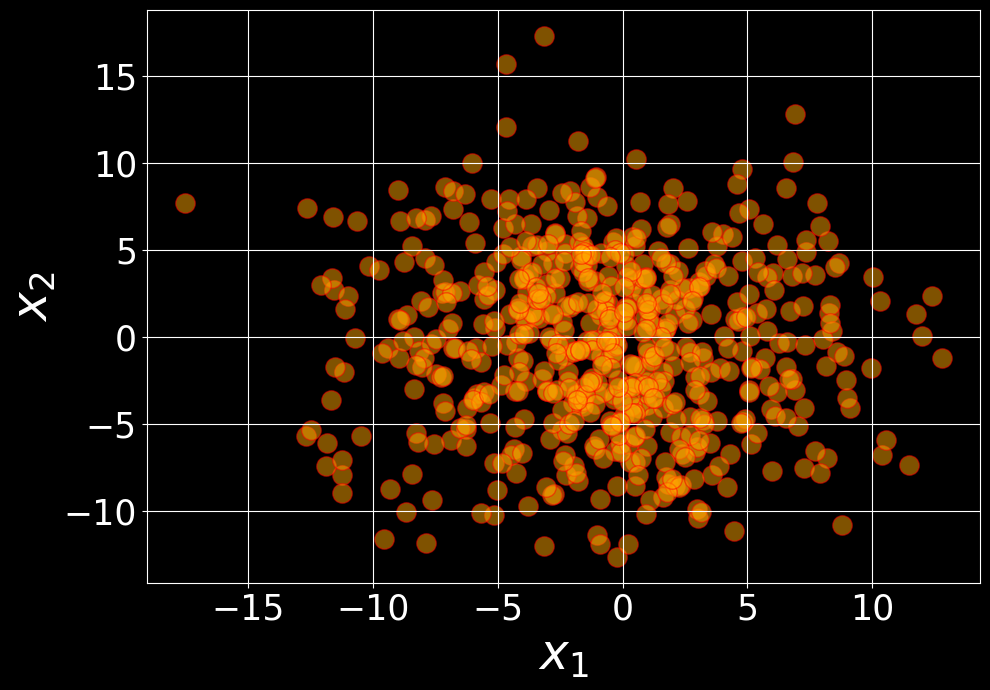

In [ ]:
#@title **Параметры распределения данных** { run: "auto" }
#@markdown ### Координаты Центра
C1 =  -1 #@param {type:"slider", min:-5, max:5, step:0.1}
C2 =  0 #@param {type:"slider", min:-5, max:5, step:0.1}
#@markdown ### "Мощность" направлений
S1 =  5 #@param {type:"slider", min:0, max:5, step:0.1}
S2 =  5 #@param {type:"slider", min:0, max:5, step:0.1}
#@markdown ### Угол наклона
theta = 9.1 #@param {type:"slider", min:0.1, max:12, step:0.1}
#@markdown ### Количество точек
N = 600 #@param {type:"slider", min:100, max:2000, step:100}

theta = np.pi/theta
Centers = np.array([C1,C2])
Sigmas = np.array([S1,S2])

# Матрица поворота
R = np.array([[np.cos(theta), - np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

X = R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))

fig = plt.figure(figsize=(10,7))
plt.grid()

plt.scatter(X[0,:],X[1:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25);
plt.tight_layout();

In [ ]:
def create_elipsoid_data(C1 = 0,C2 = 0 ,S1 = 5,S2 =1, theta =45, N = 250, random_state = 42):
    np.random.seed(random_state)

    theta = np.pi*theta/180
    Centers = np.array([C1,C2])
    Sigmas = np.array([S1,S2])

    R = np.array([[np.cos(theta), - np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])

    return (R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))).T


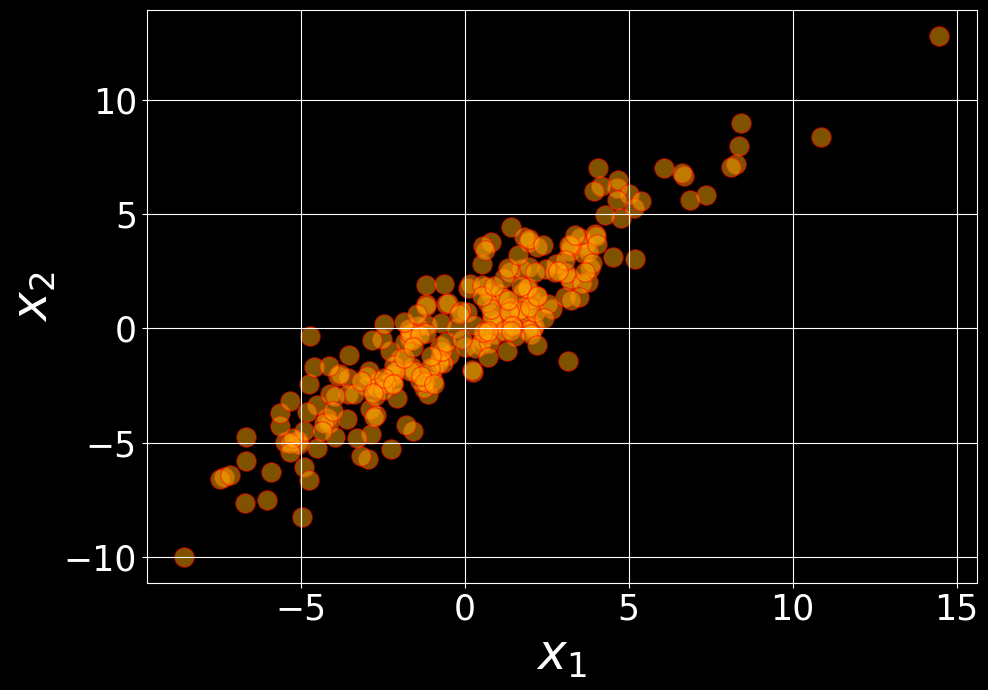

In [ ]:
X =create_elipsoid_data()


fig  = plt.figure(figsize=(10,7))
plt.scatter(X[:, 0],X[:, 1],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r');
plt.grid()

plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25);
plt.tight_layout();

In [ ]:
pca = PCA(n_components = 2)
pca.fit(X)
pca.score(X)

1.0

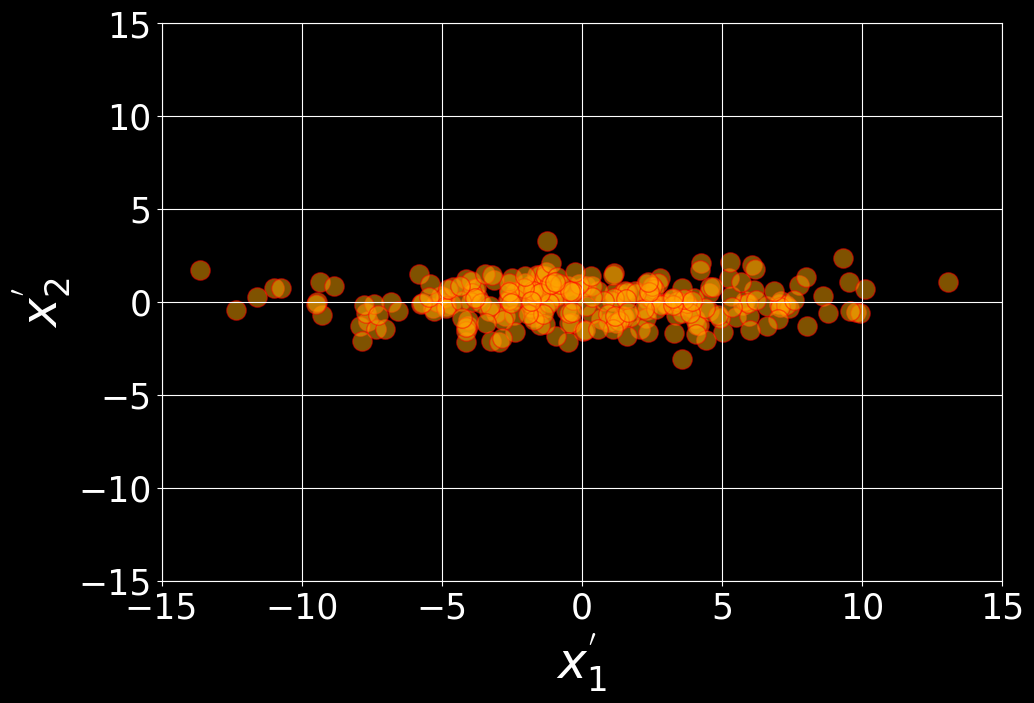

In [ ]:
X_new = pca.transform(X)

fig  = plt.figure(figsize=(10,7))

plt.scatter(X_new[:, 0],X_new[:, 1],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r');
plt.grid()
plt.xlabel(r"$x^{'}_1$",fontsize=35)
plt.ylabel(r"$x^{'}_2$",fontsize=35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25);
plt.tight_layout()
plt.xlim((-15,15))
plt.ylim((-15,15));

In [ ]:
Eigen_Vectors = pca.components
Eigen_Values = pca.values

Проверим, что полученные собственные вектора и собственные  значения действительно связаны с распределением исходных данных

Для этого выполним аффинное преобразование единичной окружности, используя собственные вектора для определения угла наклона эллипса, а собственные значения как характерный размер вдоль соответсвующей оси эллипса

In [ ]:
X_mean = np.mean(X, axis = 0)

theta_ = 2 * np.pi * np.arange(0,1,0.01)

X_std = Eigen_Vectors @ np.diag(np.sqrt(Eigen_Values)) @ np.array([np.cos(theta_),np.sin(theta_)])



"Теория" говорит о том, что полученный эллипс должен содержать в себе распределение 68% от всех точек (1 стандартное отклонение от среднего)

При этом если оси эллипса увеличить в два раза то в таком эллипсе будет 95% точек (2 стандартных оклонений от среднего)

Выполним визуализацию исходных данных, эллипсов полученыых из собственных значений и векторов, с поправкой на среднее значение, а также базис из главных компонент

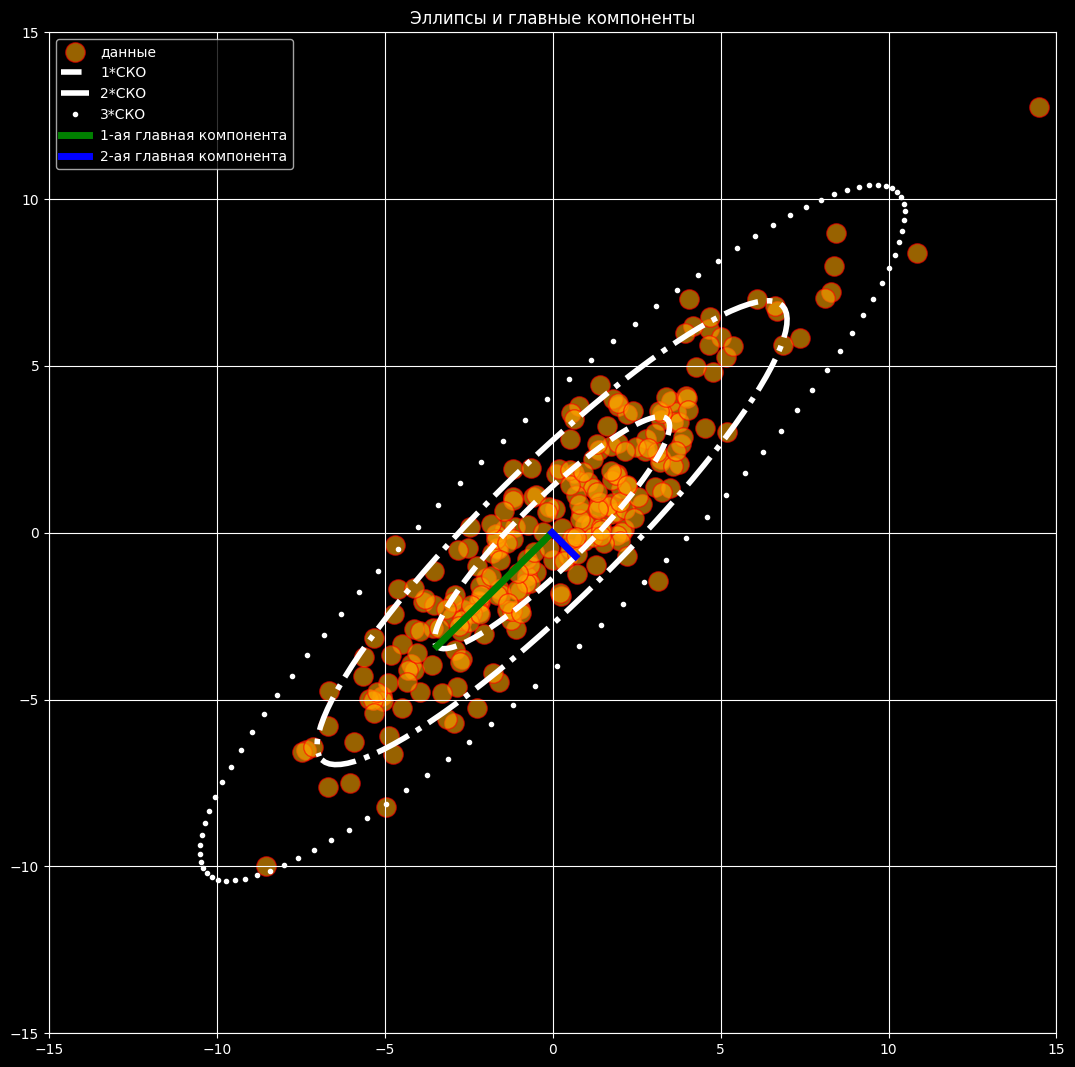

In [ ]:
fig = plt.figure(figsize=(13,13))
# рисуем данные
plt.scatter(X[:,0],X[:,1], alpha = 0.6, label = 'данные',s = 196, c = 'orange', edgecolor = 'r')
# рисуем эллипс с "диаметром" ~ 1*СКО
plt.plot(X_std[0,:]+X_mean[0],X_std[1,:]+X_mean[1],
         '--', c = 'w', linewidth = 4, label = '1*СКО')
#рисуем эллипс с "диаметром" ~ 2*СКО
plt.plot(2*X_std[0,:]+X_mean[0],2*X_std[1,:]+X_mean[1],
         '-.', c = 'w', linewidth = 4, label = '2*СКО')
#рисуем эллипс с "диаметром" ~ 3*СКО
plt.plot(3*X_std[0,:]+X_mean[0],3*X_std[1,:]+X_mean[1],
         '.', c = 'w', linewidth = 4, label = '3*СКО')
# 1-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+Eigen_Vectors[0,0]*np.sqrt(Eigen_Values[0])]),
         np.array([X_mean[1], X_mean[1]+Eigen_Vectors[1,0]*np.sqrt(Eigen_Values[0])]),
         'g',linewidth = 5, label = '1-ая главная компонента')
# 2-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+Eigen_Vectors[0,1]*np.sqrt(Eigen_Values[1])]),
         np.array([X_mean[1], X_mean[1]+Eigen_Vectors[1,1]*np.sqrt(Eigen_Values[1])]),
         'b',linewidth = 5, label = '2-ая главная компонента')
plt.xlim((-15,15))
plt.ylim((-15,15))
plt.title('Эллипсы и главные компоненты')
plt.legend()
plt.grid()


Вроде все совпадает с теорием

# Посмотрим на почти Реальных данных

In [ ]:
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)
X = X / 255.
X_ = X.values

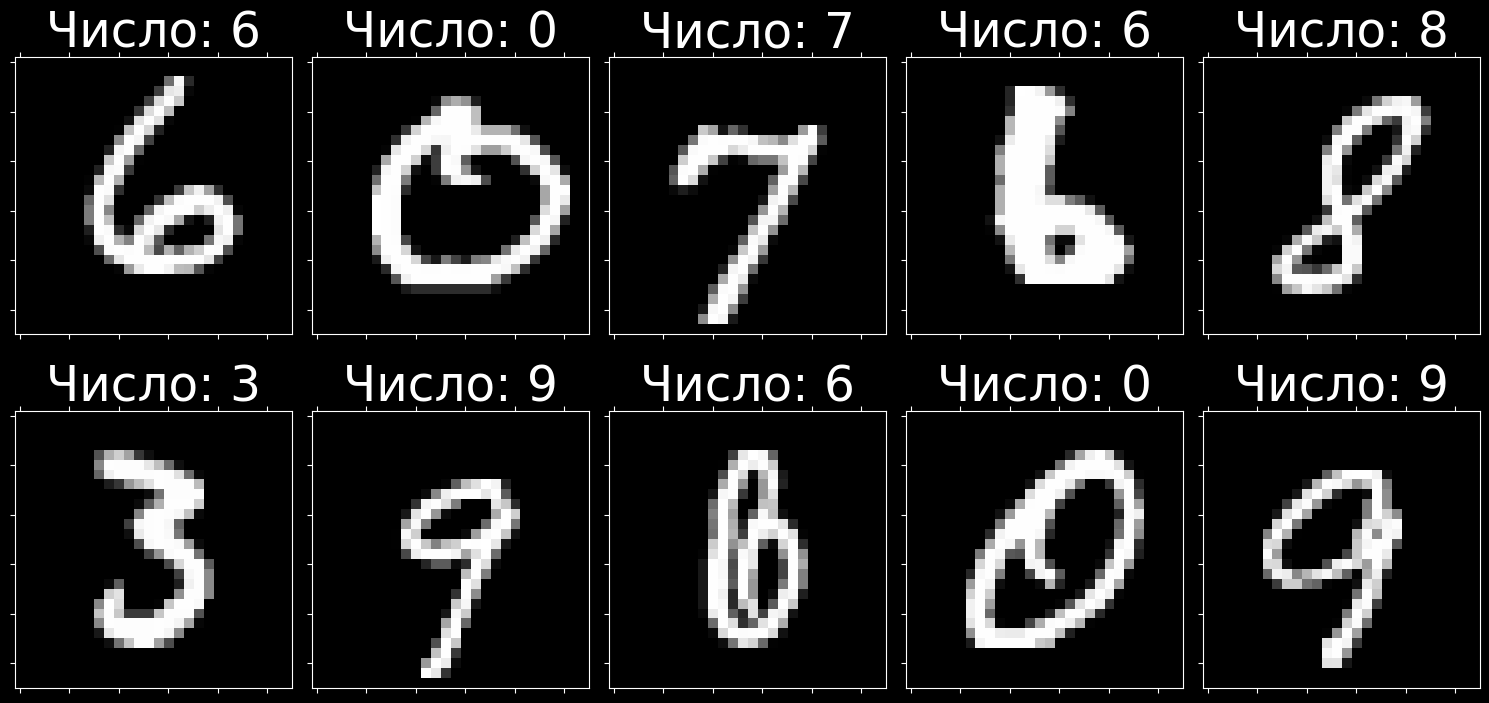

In [ ]:
#@title Разные примеры { run: "auto" }
n =  15317 #@param {type:"slider", min:1, max:69984, step:1}

fig = plt.figure( figsize=(15,8) )
for i in range(0,10):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
  ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
             cmap='Greys')
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
  plt.tight_layout()


# Применяем Метод Главных Компонент к Данным

In [ ]:
pca = PCA(n_components = 100)
pca.fit(X_)
pca.score(X_)

0.9398662110143557

In [ ]:
pca_result_mnist = pca.transform(X_)

In [ ]:
pca_inverse = pca.inverse_transform(pca_result_mnist)

In [ ]:
pca_inverse.shape

(70000, 784)

# Визуализация

Разная

**Собственные значения**

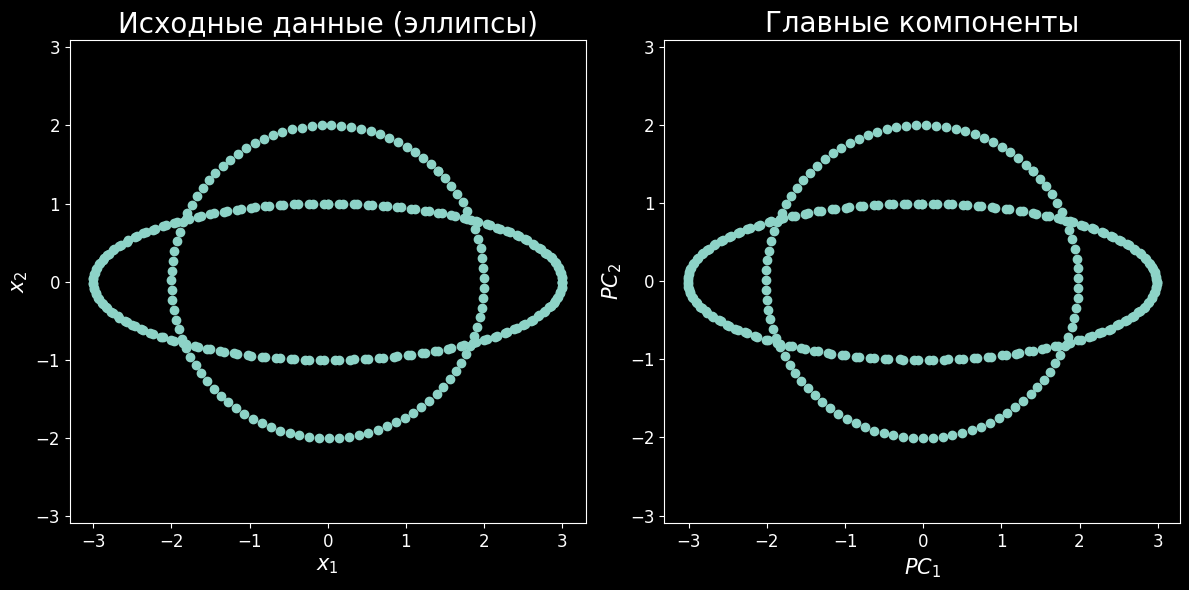

Собственные значения: [3.67872867 1.00326337]
Собственные вектора:
 [[ 0.99999698  0.00245571]
 [-0.00245571  0.99999698]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Генерация данных в виде эллипса
def generate_ellipse(a, b, angle, num_points=100):
    t = np.linspace(0, 2 * np.pi, num_points)
    x = a * np.cos(t)
    y = b * np.sin(t)

    # Поворот
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                 [np.sin(angle), np.cos(angle)]])
    ellipsoid = np.dot(rotation_matrix, np.array([x, y]))

    return ellipsoid.T

# Параметры эллипсов
ellipses_params = [
    (3, 1, 0),          # a, b, angle
    (2, 2, np.pi / 4),
    (1, 3, np.pi / 2)
]

# Генерация данных
data = np.vstack([generate_ellipse(a, b, angle) for a, b, angle in ellipses_params])

# Применение PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Визуализация эллипсов
plt.figure(figsize=(12, 6))

# Исходные данные
plt.subplot(1, 2, 1)
plt.title("Исходные данные (эллипсы)", fontsize=20)
plt.scatter(data[:, 0], data[:, 1])
plt.axis('equal')
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Главные компоненты
plt.subplot(1, 2, 2)
plt.title("Главные компоненты", fontsize=20)
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.axis('equal')
plt.xlabel(r'$PC_1$', fontsize=15)
plt.ylabel(r'$PC_2$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Оценка собственных векторов
print("Собственные значения:", pca.explained_variance_)
print("Собственные вектора:\n", pca.components_)

**Очень интересный график**

In [ ]:
def plot_multi(data, y,  names):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]


    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y, s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15)
        ax.add_artist(legend1)

In [ ]:
pca_names = [str(x+1)+' Главная Компонента' for x in range(4)]

**Пространство Главных Компонент**

In [ ]:
plot_multi(pca_result_mnist, y.astype(int), pca_names);

NameError: name 'pca_result_mnist' is not defined

# Восстановление данных

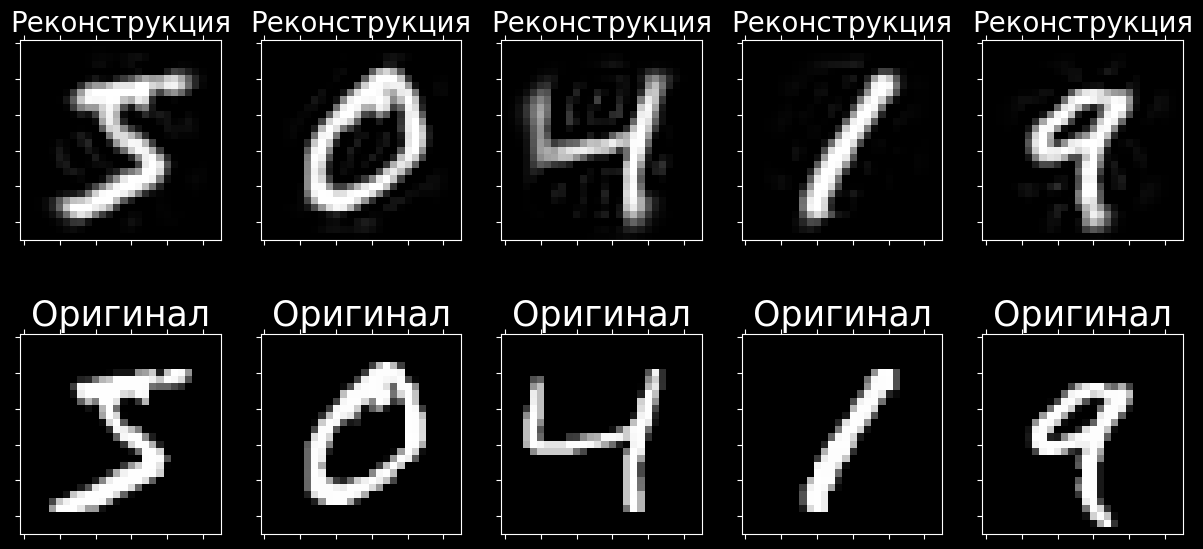

In [ ]:
fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)
  ax.matshow(1-pca_inverse[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)
  ax.matshow(1-X_[i,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

plt.savefig('Рис5_6.png', dpi = 300,bbox_inches='tight');

# Попытка понять что значат главные компоненты

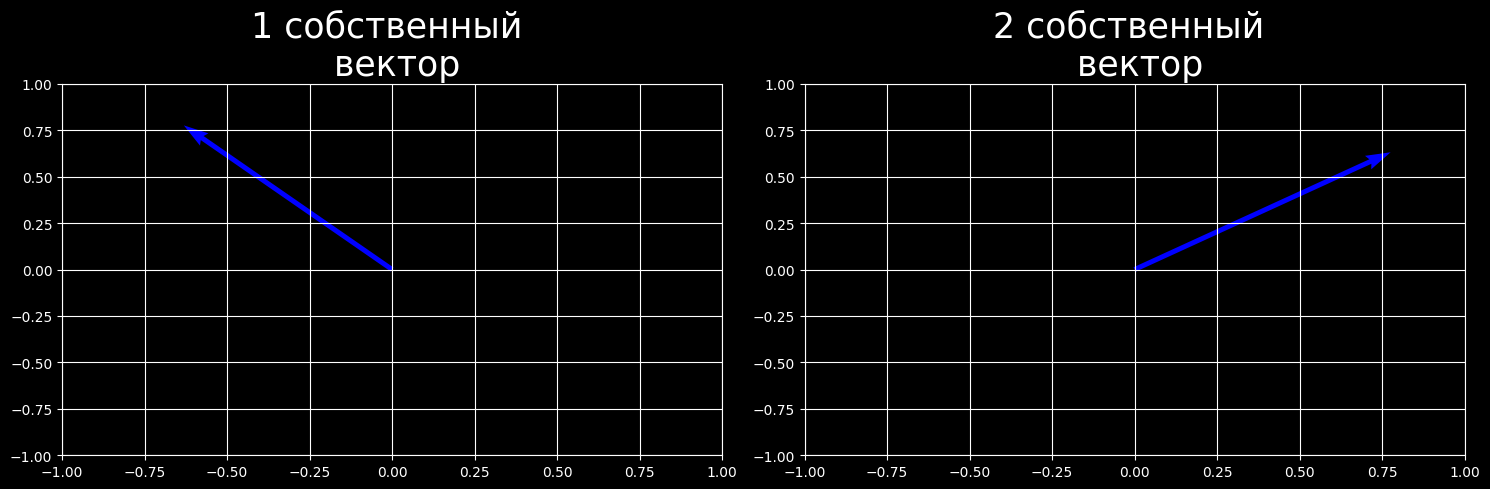

Собственные значения: [0.08690675 0.0755658 ]
Собственные вектора:
 [[-0.63106527  0.77572974]
 [ 0.77572974  0.63106527]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Загрузка данных (замените на ваш набор данных)
# Пример: случайные данные
np.random.seed(0)
data = np.random.rand(100, 2)  # 100 образцов, 2 признака

# Применение PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Получение собственных векторов
W_pca = pca.components_

# Визуализация собственных векторов
fig = plt.figure(figsize=(15, 5))
for i in range(W_pca.shape[0]):  # Количество собственных векторов
    ax = fig.add_subplot(1, W_pca.shape[0], i + 1)
    ax.set_title("{} собственный \n вектор".format(str(i + 1)), size=25)
    ax.quiver(0, 0, W_pca[i, 0], W_pca[i, 1], angles='xy', scale_units='xy', scale=1, color='b')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid()

plt.tight_layout()
plt.show()

# Оценка собственных значений
print("Собственные значения:", pca.explained_variance_)
print("Собственные вектора:\n", W_pca)


In [ ]:
pca.explained_variance_

array([0.08690675, 0.0755658 ])

In [ ]:
pca.components_

array([[-0.63106527,  0.77572974],
       [ 0.77572974,  0.63106527]])

# Практические задания

## 1. Сгенерируйте данные в виде эллипса с разными значениями радиусов и углов наклона. Примените метод главных компонент. Визуализируйте пространство главных компонент, оцените собственные значения и собственные вектора.

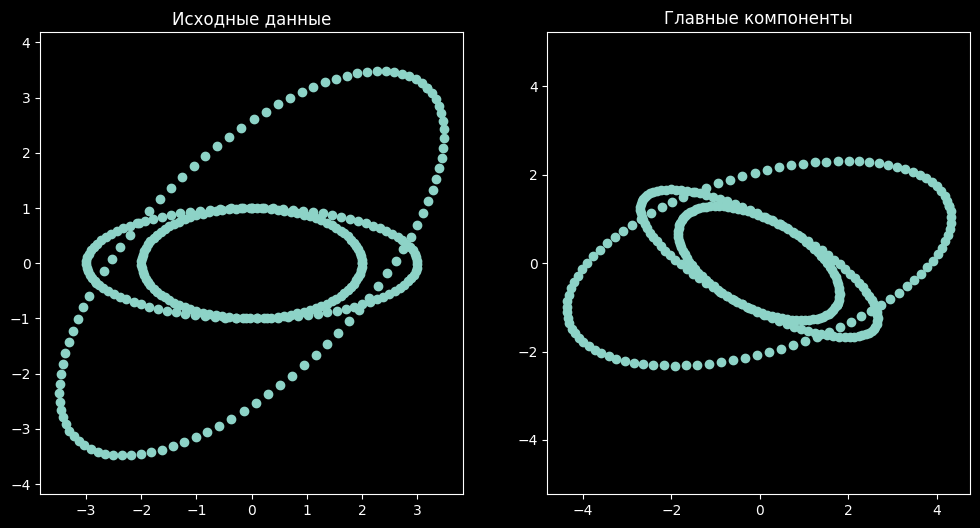

Собственные значения: [4.94593507 1.63592845]
Собственные вектора:
 [[ 0.88124085  0.47266749]
 [-0.47266749  0.88124085]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Генерация данных в виде эллипса
def generate_ellipse(a, b, angle, num_points=100):
    t = np.linspace(0, 2 * np.pi, num_points)
    x = a * np.cos(t)
    y = b * np.sin(t)

    # Поворот
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                 [np.sin(angle), np.cos(angle)]])
    ellipsoid = np.dot(rotation_matrix, np.array([x, y]))

    return ellipsoid.T

# Параметры эллипсов
ellipses_params = [
    (2, 1, 0),          # a, b, angle
    (4.5, 2, np.pi / 4),
    (1, 3, np.pi / 2)
]

# Генерация данных
data = np.vstack([generate_ellipse(a, b, angle) for a, b, angle in ellipses_params])

# Применение PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Исходные данные")
plt.scatter(data[:, 0], data[:, 1])
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.title("Главные компоненты")
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.axis('equal')

plt.show()

# Оценка собственных значений и векторов
print("Собственные значения:", pca.explained_variance_)
print("Собственные вектора:\n", pca.components_)


## 2. Загрузите данные MNIST. Поэкспериментируйте с количеством компонент при применении метода главных компонент. Оцените качество восстановления при разных значениях размерности собственного пространства. Визуализируйте разные пространства главных компонент.

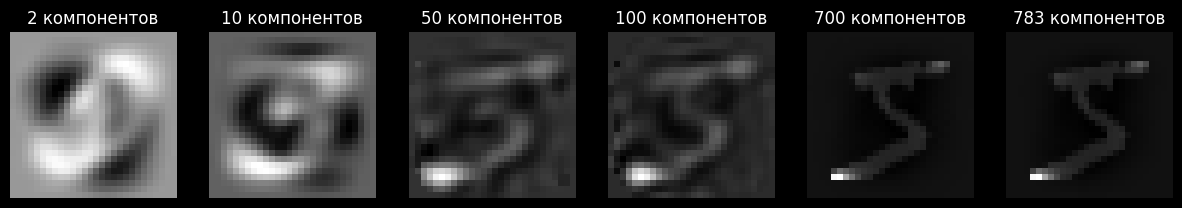

Цифра, которая была отрисована: 5


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Опыт с разным количеством компонентов
n_components_list = [2, 10, 50, 100, 700, 783]
fig, axes = plt.subplots(1, len(n_components_list), figsize=(15, 4))

for i, n_components in enumerate(n_components_list):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Восстановление данных
    X_recovered = pca.inverse_transform(X_pca)

    # Визуализация первого образца восстановленных данных
    axes[i].imshow(X_recovered[0].reshape(28, 28), cmap='gray')  # Визуализируем только первый образец
    axes[i].set_title(f"{n_components} компонентов")
    axes[i].axis('off')

# Визуализация восстанавливаемого изображения и его метки
index = 0  # или другой индекс, который вы хотите проверить
plt.imshow(X_recovered[index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

# Вывод цифры
print(f'Цифра, которая была отрисована: {y[index]}')


## 3. Примените метод главных компонент для набора данных Cars:

## •	 выполните визуализацию пространства главных компонент и оцените их связь с исходными признаками;
## •	 примените пространство главных компонент в качествевходных данных для алгоритмов;
## •	 сравните результаты модели при использовании только числовых признаков и при добавлении категориальных признаков с использованием One-Hot-кодирования.

### Шаг 1: Подготовка данных и визуализация главных компонент
Загрузите данные и выберите числовые признаки.

Проведите стандартизацию данных.

PCA чувствителен к масштабу данных, поэтому необходимо стандартизировать данные, чтобы признаки имели одинаковый масштаб.

Примените метод главных компонент (PCA).

Визуализируйте главные компоненты и оцените их связь с исходными признаками.

### Шаг 2: Использование главных компонент в качестве входных данных для моделей

Постройте модель на основе пространства главных компонент.

Оцените качество модели.

### Шаг 3: Сравнение моделей с числовыми и категориальными признаками

Добавьте категориальные признаки в исходные данные, применив One-Hot-кодирование.

Сравните результаты модели, обученной на данных с только числовыми признаками и на данных с числовыми и категориальными признаками.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


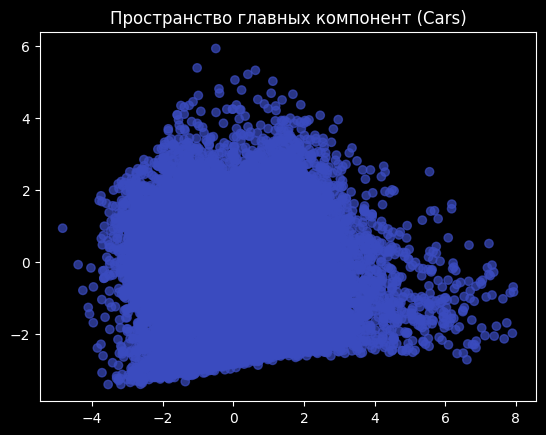

Собственные значения: [1.9631804  1.45147536]
Собственные векторы:
 [[ 6.19350007e-01 -3.96899012e-01  1.95835055e-01  6.15415016e-01
   2.04425371e-01]
 [ 1.32076324e-01  6.35274134e-01  7.92866627e-02  1.76680806e-04
   7.56766948e-01]]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('cars_moldova_cat_num.csv')

# Стандартизация числовых признаков
numeric_features = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']
X_numeric = data[numeric_features]
X_scaled = StandardScaler().fit_transform(X_numeric)

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация главных компонент
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0), cmap='coolwarm', alpha=0.7)
plt.title("Пространство главных компонент (Cars)")
plt.show()

# Собственные значения и векторы
print("Собственные значения:", pca.explained_variance_)
print("Собственные векторы:\n", pca.components_)


In [ ]:
# Применение PCA из scikit-learn
pca = PCA(n_components=2)
X_sklearn_pca = pca.fit_transform(X_scaled)

# Собственные значения и векторы scikit-learn
sklearn_eigenvalues = pca.explained_variance_
sklearn_eigenvectors = pca.components_

print("\nSсikit-learn собственные значения:\n", sklearn_eigenvalues)
print("Sсikit-learn собственные векторы:\n", sklearn_eigenvectors)

# Сравнение собственных значений
print("\nСравнение собственных значений:\n", np.allclose(pca.explained_variance_, sklearn_eigenvalues))

# Сравнение собственных векторов
print("Сравнение собственных векторов:\n", np.allclose(np.abs(pca.components_), np.abs(sklearn_eigenvectors)))


Sсikit-learn собственные значения:
 [1.9631804  1.45147536]
Sсikit-learn собственные векторы:
 [[ 6.19350007e-01 -3.96899012e-01  1.95835055e-01  6.15415016e-01
   2.04425371e-01]
 [ 1.32076324e-01  6.35274134e-01  7.92866627e-02  1.76680806e-04
   7.56766948e-01]]

Сравнение собственных значений:
 True
Сравнение собственных векторов:
 True


## 4*. Сравните работу реализованных алгоритмов с функцией библиотеки scikit-learn - методом главных компонент sklearn.decomposition.PCA.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Предполагаем, что X_scaled уже определен, как в предыдущем коде:
# Стандартизация данных
# numeric_features = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']
# X_numeric = data[numeric_features]
# X_scaled = StandardScaler().fit_transform(X_numeric)

# Кастомная реализация PCA
def custom_pca(X, n_components):
    # Центрирование данных (вычитание среднего)
    X_centered = X - np.mean(X, axis=0)

    # Вычисление ковариационной матрицы
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Вычисление собственных векторов и значений
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Сортировка собственных векторов по убыванию собственных значений
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]

    # Выбор n_components главных компонент
    eigenvectors_subset = eigenvectors[:, :n_components]

    # Преобразование данных
    X_reduced = np.dot(X_centered, eigenvectors_subset)

    return X_reduced, eigenvalues[:n_components], eigenvectors_subset

# Применение PCA из scikit-learn
pca = PCA(n_components=2)
X_sklearn_pca = pca.fit_transform(X_scaled)

# Собственные значения и векторы scikit-learn
sklearn_eigenvalues = pca.explained_variance_
sklearn_eigenvectors_T = sklearn_eigenvectors.T

print("Scikit-learn собственные значения:\n", sklearn_eigenvalues)
print("Sсikit-learn собственные векторы:\n", sklearn_eigenvectors_T)
# Кастомный PCA для тех же данных
X_custom_pca, custom_eigenvalues, custom_eigenvectors = custom_pca(X_scaled, n_components=2)

# Сравнение собственных значений
print("\nКастомные собственные значения:\n", custom_eigenvalues)
print("Сравнение собственных значений:", np.allclose(custom_eigenvalues, sklearn_eigenvalues))

# Сравнение собственных векторов
print("\nКастомные собственные векторы:\n", custom_eigenvectors)
print("Сравнение собственных векторов:", np.allclose(np.abs(custom_eigenvectors), np.abs(sklearn_eigenvectors_T)))


Scikit-learn собственные значения:
 [1.9631804  1.45147536]
Sсikit-learn собственные векторы:
 [[ 6.19350007e-01  1.32076324e-01]
 [-3.96899012e-01  6.35274134e-01]
 [ 1.95835055e-01  7.92866627e-02]
 [ 6.15415016e-01  1.76680806e-04]
 [ 2.04425371e-01  7.56766948e-01]]

Кастомные собственные значения:
 [1.9631804  1.45147536]
Сравнение собственных значений: True

Кастомные собственные векторы:
 [[-6.19350007e-01 -1.32076324e-01]
 [ 3.96899012e-01 -6.35274134e-01]
 [-1.95835055e-01 -7.92866627e-02]
 [-6.15415016e-01 -1.76680806e-04]
 [-2.04425371e-01 -7.56766948e-01]]
Сравнение собственных векторов: True


# Контрольные вопросы

## 1.	Как связаны главные компоненты с исходными данными?



  Ответ:

  Главные компоненты (ГК) представляют собой новые переменные, полученные в
результате применения метода главных компонент (PCA) к исходным данным. Эти новые переменные — линейные комбинации оригинальных признаков, которые позволяют уменьшить размерность данных, сохраняя при этом как можно больше информации о их вариативности.
Связь между главными компонентами и исходными данными можно описать следующим образом:
1.	Линейные комбинации: Каждая главная компонента является линейной комбинацией исходных признаков. Это значит, что для каждых ГК используется взвешенное суммирование оригинальных признаков с определёнными коэффициентами (весами).
2.	Максимизация дисперсии: ГК вычисляются так, чтобы максимизировать дисперсию данных в новом пространстве. Первые ГК имеет наибольшую дисперсию, вторая — вторую по величине дисперсию, и так далее.
3.	Ортогональность: Главные компоненты являются ортогональными друг к другу, что означает, что они независимы и не коррелированы. Это упрощает анализ и интерпретацию данных.
4.	Интерпретация: Каждая главная компонента может быть интерпретирована как направление в пространстве, вдоль которого данные наиболее вариативны. Это помогает выявить скрытые структуры и паттерны в данных.
   Таким образом, главные компоненты представляют собой упрощённую, но
информативную репрезентацию исходных данных, позволяя эффективно анализировать и визуализировать сложные многомерные наборы данных.


## 2.	Сделайте грубую оценку сжатия данных, если исходная матрица имела размерность (4250, 7), а при восстановлении используются три главные компоненты.



Ответ:

   Для грубой оценки степени сжатия данных при использовании метода главных
компонент (PCA), можно рассчитать количество данных до и после сжатия, а затем вычислить отношение.

 Исходные данные имеют размерность
4250×7. Это означает, что мы имеем 4250 объектов, и каждый из них представлен семью признаками. Общий объем данных в исходной матрице:

V
initial
​
 =4250×7=29750 единиц данных
  После сжатия до трёх главных компонент, каждая из 4250 строк будет представлена
тремя признаками:

V
compressed
​
 =4250×3=12750 единиц данных

Теперь можно вычислить коэффициент сжатия K как отношение объема данных до сжатия к объему данных после сжатия:

K = V initial / V compressed = 29750/12750 ≈ 2.33
Таким образом, данные были сжаты примерно в 2.33 раза.








## 3.	 Сгенерируйте данные в виде эллипса с центром в точке (1.5,	2.5), радиусами (3, 2.5), углом 65 и количеством точек 1100. Оцените собственные вектора, собственные значения, максимальные и минимальные значения в пространстве главных компонент.

Ответ:


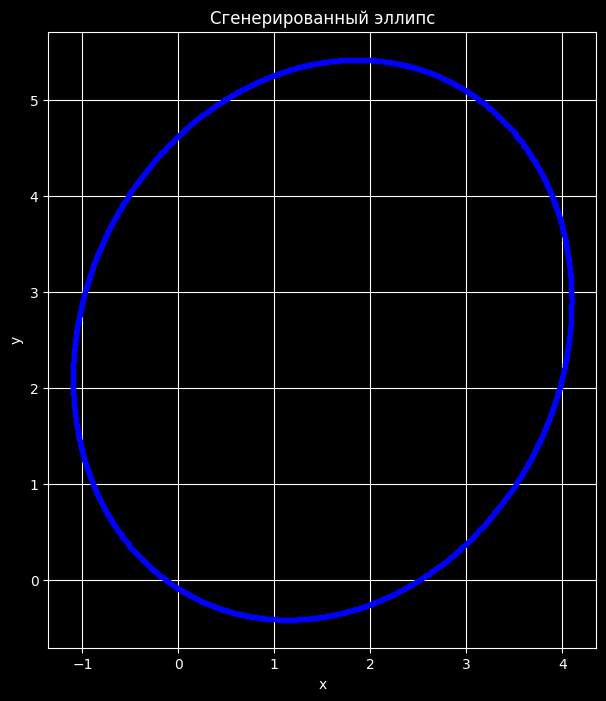

Собственные значения:
 [3.125      4.50818182]
Собственные векторы:
 [[-0.90630779 -0.42261826]
 [ 0.42261826 -0.90630779]]
Минимальные значения в пространстве главных компонент:
 [-2.49999745 -2.99727273]
Максимальные значения в пространстве главных компонент:
 [2.49999745 3.00271502]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры эллипса
center = (1.5, 2.5)  # Центр эллипса
radii = (3, 2.5)  # Радиусы по осям
angle_deg = 65  # Угол поворота эллипса
n_points = 1100  # Количество точек

# Угол в радианах
angle_rad = np.deg2rad(angle_deg)

# Генерация точек на эллипсе
t = np.linspace(0, 2 * np.pi, n_points)
x_ellipse = radii[0] * np.cos(t)
y_ellipse = radii[1] * np.sin(t)

# Поворот эллипса на заданный угол
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])
ellipse_points = np.dot(rotation_matrix, np.array([x_ellipse, y_ellipse]))

# Смещение к центру
ellipse_points[0, :] += center[0]
ellipse_points[1, :] += center[1]

# Визуализация эллипса
plt.figure(figsize=(8, 8))
plt.plot(ellipse_points[0, :], ellipse_points[1, :], 'b.')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Сгенерированный эллипс")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Оценка собственных значений и собственных векторов
cov_matrix = np.cov(ellipse_points)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Трансформация данных в пространство главных компонент
ellipse_points_centered = ellipse_points - np.mean(ellipse_points, axis=1, keepdims=True)
pc_space = np.dot(eigenvectors.T, ellipse_points_centered)

# Минимальные и максимальные значения в пространстве главных компонент
min_values = np.min(pc_space, axis=1)
max_values = np.max(pc_space, axis=1)

# Вывод результатов
print("Собственные значения:\n", eigenvalues)
print("Собственные векторы:\n", eigenvectors)
print("Минимальные значения в пространстве главных компонент:\n", min_values)
print("Максимальные значения в пространстве главных компонент:\n", max_values)


## 4.Для набора данных Cars проанализируйте веса главных компонент при использовании числовых признаков. Какой из параметров вносит наименьший вклад в первую главную компоненту?

Ответ:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузка данных из файла сars.csv
from google.colab import files
uploaded = files.upload()

# Чтение загруженного файла в DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Выбор числовых признаков (убедитесь, что правильные столбцы выбраны)
numerical_data = data[['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']]

# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Применение PCA
pca = PCA(n_components=4)
pca.fit(scaled_data)

# Получение весов главных компонент
pca_components = pca.components_[0]

# Создание DataFrame для визуализации вкладов
component_weights = pd.DataFrame({
    'Признак': numerical_data.columns,
    'Вклад в первую главную компоненту': pca_components
}).sort_values(by='Вклад в первую главную компоненту', ascending=False)

# Вывод результатов
print("Веса главных компонент для первой главной компоненты:")
print(component_weights)

# Параметр с наименьшим вкладом в первую главную компоненту
naim_menshiy_vklad = component_weights.iloc[-1]
print("\nПризнак с наименьшим вкладом в первую главную компоненту:")
print(naim_menshiy_vklad)


Saving cars.csv to cars (1).csv
Веса главных компонент для первой главной компоненты:
                Признак  Вклад в первую главную компоненту
0                  Year                           0.650361
3           Price(euro)                           0.580194
2  Engine_capacity(cm3)                           0.188220
1              Distance                          -0.452745

Признак с наименьшим вкладом в первую главную компоненту:
Признак                              Distance
Вклад в первую главную компоненту   -0.452745
Name: 1, dtype: object
